<img src="./images/banner.png" width="800">

# Generalized Linear Models (GLMs)

Generalized Linear Models (GLMs) are a powerful and flexible extension of ordinary linear regression that allow us to analyze a wider range of data and research questions. In this section, we'll explore what GLMs are, why they're important, and when to use them.


Generalized Linear Models are a class of statistical models that extend ordinary linear regression to handle non-normally distributed response variables and non-linear relationships between predictors and the response.


GLMs provide a unified framework for various types of regression models, including:

1. Linear regression
2. Logistic regression
3. Poisson regression
4. Negative binomial regression
5. Gamma regression


These models allow us to analyze data with different types of outcome variables, such as binary outcomes, counts, or skewed continuous data.


🤔 **Why This Matters:** In real-world research, we often encounter data that doesn't meet the assumptions of ordinary linear regression. GLMs give us the tools to properly analyze these diverse types of data.


GLMs are crucial for several reasons:

1. They allow for more accurate modeling of non-normal data.
2. They can handle non-linear relationships between predictors and outcomes.
3. They provide a consistent framework for various types of regression analyses.
4. They help prevent incorrect conclusions that might arise from using inappropriate models.


❗️ **Important Note:** You should consider using GLMs when your data violates the assumptions of ordinary linear regression, particularly when:

1. Your outcome variable is not normally distributed. For example, if you're modeling the number of car accidents at an intersection, the data is likely to be skewed to the right (more zeros and fewer higher values).
2. The relationship between predictors and the outcome is non-linear. For example, the effect of education level on income might not be linear; it might increase at a decreasing rate as education level increases.
3. The variance of your outcome is not constant (heteroscedasticity). For example, the variability in income might increase with income level.


Examples of situations where GLMs are appropriate include:

- Predicting binary outcomes (e.g., survival, occurrence of an event)
- Analyzing count data (e.g., number of doctor visits, crime incidents)
- Modeling skewed continuous data (e.g., income, reaction times)


A Generalized Linear Model consists of three main components:

1. **Systematic component:** The linear combination of predictors (similar to ordinary linear regression). It is called the "systematic component" because it represents the systematic part of the model, which is the part that captures the linear relationship between the predictors and the response. The systematic component is what allows us to make predictions based on the values of the predictors.
2. **Link function:** A function that connects the systematic component to the response variable (Dependent Variable). Link functions are used to ensure that the predictions from the model fall within the valid range for the response variable and to linearize non-linear relationships.
3. **Random component:** The probability distribution of the response variable. The term "random component" in the context of Generalized Linear Models (GLMs) refers to the stochastic (random) nature of the response variable ( Y ). Here's why it is called the "random component":

We'll explore each of these components in detail in the following sections.


Generalized Linear Models extend the capabilities of ordinary linear regression to handle a wide range of data types and relationships. By choosing appropriate probability distributions and link functions, GLMs allow researchers to analyze non-normal data and non-linear relationships accurately. In the next sections, we'll dive deeper into the components of GLMs and how to choose the right model for your data.

**Table of contents**<a id='toc0_'></a>    
- [Review of Linear Regression and Normal Distribution](#toc1_)    
  - [Assumptions of Linear Regression](#toc1_1_)    
  - [From Linear Regression to GLMs](#toc1_2_)    
- [The Three Components of Generalized Linear Models](#toc2_)    
  - [Overview of GLM Components](#toc2_1_)    
  - [The Random Component](#toc2_2_)    
  - [The Systematic Component](#toc2_3_)    
  - [The Link Function](#toc2_4_)    
  - [Putting It All Together](#toc2_5_)    
- [Understanding Link Functions](#toc3_)    
  - [Why Do We Need Link Functions?](#toc3_1_)    
  - [Common Link Functions](#toc3_2_)    
  - [Choosing the Right Link Function](#toc3_3_)    
  - [Visualizing Link Functions](#toc3_4_)    
  - [Practical Example: Predicting Insurance Claims](#toc3_5_)    
- [Common Probability Distributions in GLMs](#toc4_)    
  - [Common Probability Distributions in GLMs](#toc4_1_)    
  - [Choosing the Right Distribution](#toc4_2_)    
  - [Visualizing Distributions](#toc4_3_)    
  - [Practical Example: Analyzing Customer Churn](#toc4_4_)    
- [Choosing the Right GLM for Your Data](#toc5_)    
  - [A Step-by-Step Approach to Choosing Your GLM](#toc5_1_)    
  - [Common GLMs and When to Use Them](#toc5_2_)    
  - [Practical Example: Choosing a GLM for Customer Lifetime Value](#toc5_3_)    
  - [Common Pitfalls to Avoid](#toc5_4_)    
- [Advantages and Limitations of GLMs](#toc6_)    
  - [Advantages of GLMs](#toc6_1_)    
  - [Limitations of GLMs](#toc6_2_)    
  - [When to Use GLMs (and When Not To)](#toc6_3_)    
  - [Practical Example: Evaluating GLM Fit](#toc6_4_)    
- [Summary](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Review of Linear Regression and Normal Distribution](#toc0_)

Before diving into the complexities of Generalized Linear Models, let's review the foundations of linear regression and the normal distribution. This review will help us understand why GLMs are necessary and how they build upon these fundamental concepts.


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables, assuming a linear relationship. The basic form of a simple linear regression model is:

$Y = \beta_0 + \beta_1X + \epsilon$

Where:
- $Y$ is the dependent variable
- $X$ is the independent variable
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term


For multiple linear regression, we extend this to include multiple predictors:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$


### <a id='toc1_1_'></a>[Assumptions of Linear Regression](#toc0_)


Linear regression relies on several key assumptions:

1. **Linearity:** The relationship between X and Y is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The variance of residuals is constant across all levels of X.
4. **Normality:** The residuals are normally distributed.


❗️ **Important Note:** Violations of these assumptions can lead to unreliable results and incorrect inferences.


The normal distribution, also known as the Gaussian distribution, plays a crucial role in linear regression and many statistical methods. Key properties of the normal distribution:

1. It's symmetric around the mean.
2. The mean, median, and mode are all equal.
3. Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.


The probability density function (PDF) of a normal distribution is given by:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$


In linear regression, we assume that the residuals (the differences between observed and predicted values) follow a normal distribution. This assumption is crucial for several reasons:

1. It allows us to use probability theory to make inferences about the population.
2. It enables the calculation of confidence intervals and p-values.
3. It justifies the use of least squares estimation for finding the best-fitting line.


💡 **Pro Tip:** While the normal distribution is powerful and widely applicable, it's not always appropriate for real-world data.


Some limitations include:

1. Many real-world phenomena are not normally distributed (e.g., count data, binary outcomes).
2. The normal distribution assumes symmetry, which is often violated in practice.
3. It can lead to nonsensical predictions (e.g., negative values for strictly positive quantities).


### <a id='toc1_2_'></a>[From Linear Regression to GLMs](#toc0_)


These limitations of linear regression and the normal distribution assumption lead us to Generalized Linear Models. GLMs allow us to:

1. Model non-normally distributed outcomes.
2. Handle non-linear relationships between predictors and the outcome.
3. Maintain the interpretability and flexibility of linear models.


In the next sections, we'll explore how GLMs extend these concepts to accommodate a wider range of data types and relationships.


Understanding linear regression and the normal distribution is crucial for appreciating the power and flexibility of Generalized Linear Models. While linear regression is a powerful tool, its assumptions, particularly the normality of residuals, can be restrictive in many real-world scenarios. GLMs build upon these foundations to provide a more versatile framework for statistical modeling.

## <a id='toc2_'></a>[The Three Components of Generalized Linear Models](#toc0_)


Generalized Linear Models (GLMs) are like a Swiss Army knife in the world of statistics. They extend the concept of linear regression to handle a wide variety of data types and relationships. To understand GLMs, we need to break them down into their three essential components. Think of these components as the building blocks that work together to create a flexible and powerful modeling framework.


### <a id='toc2_1_'></a>[Overview of GLM Components](#toc0_)


Every Generalized Linear Model consists of three essential components:

1. The Random Component
2. The Systematic Component
3. The Link Function


Imagine you're building a custom car. The random component is like choosing the type of engine, the systematic component is the chassis and drivetrain, and the link function is the transmission that connects the engine to the wheels. Each part plays a crucial role in how the car (our model) performs.


Let's dive into each component in detail:


### <a id='toc2_2_'></a>[The Random Component](#toc0_)


The random component specifies the probability distribution of the response variable. It's like choosing the right engine for your car based on what you want to do with it. Characteristics of the random component are:

- It defines the nature of the outcome variable (e.g., binary, count, continuous).
- It determines the appropriate error structure for the model.
- It belongs to the exponential family of distributions.

GLMs use distributions from the exponential family because of their mathematical properties that make them particularly suitable for this framework. Advantages of the exponential family include:

1. **Mathematical Convenience:** The exponential family has properties that make derivation of maximum likelihood estimates straightforward.

2. **Unified Framework:** It allows for a unified approach to estimation and inference across different types of response variables.

3. **Sufficient Statistics:** Exponential family distributions have sufficient statistics that capture all the information about the parameters in a fixed number of values, regardless of sample size.

Let's break this down with some examples:

1. **Normal (Gaussian) distribution:** 
   - Use case: Continuous data that's roughly symmetric around a mean.
   - Example: Predicting a person's height based on their parents' heights.

2. **Binomial distribution:** 
   - Use case: Binary outcomes or proportions.
   - Example: Predicting whether a customer will buy a product (yes/no).

3. **Poisson distribution:** 
   - Use case: Count data, especially for rare events.
   - Example: Predicting the number of car accidents at an intersection per month.

4. **Gamma distribution:** 
   - Use case: Positive, continuous, right-skewed data.
   - Example: Predicting insurance claim amounts.

5. **Negative Binomial distribution:** 
   - Use case: Count data with overdispersion (variance > mean).
   - Example: Predicting the number of fish caught by anglers, where some are much more skilled than others.


🤔 **Why This Matters:** Choosing the correct distribution is like picking the right tool for the job. You wouldn't use a hammer to paint a wall, and similarly, you wouldn't use a normal distribution to model binary outcomes.


### <a id='toc2_3_'></a>[The Systematic Component](#toc0_)


The systematic component, also known as the linear predictor, specifies how the predictor variables combine to influence the outcome. It's like the chassis and drivetrain of our car - it provides the structure and determines how the various parts (predictors) work together. Characteristics of the systematic component are:

- It's similar to the right-hand side of a linear regression equation.
- It combines the effects of predictor variables linearly.


The general form of the systematic component is:

$\eta = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

Where:
- $\eta$ (eta) is the linear predictor
- $\beta_0, \beta_1, ..., \beta_p$ are the regression coefficients
- $X_1, X_2, ..., X_p$ are the predictor variables


Let's break this down with an example:

Imagine we're predicting a person's salary based on their years of experience and education level. Our systematic component might look like this:

$\eta = 30000 + 2000 * \text{Experience} + 5000 * \text{Education}$


Here, $30000$ is the intercept ($\beta_0$), $2000$ is the coefficient for Experience ($\beta_1$), and $5000$ is the coefficient for Education ($\beta_2$).


This linear combination provides the backbone of our model, just like the chassis provides the structure for our car.


### <a id='toc2_4_'></a>[The Link Function](#toc0_)


The link function is the magic that connects the systematic component to the mean of the random component. It's like the transmission in our car analogy - it takes the power from the engine (random component) and translates it through the drivetrain (systematic component) to make the wheels turn. Characteristics of the link function are:

- It transforms the expected value of the response variable to the linear predictor.
- It ensures that the model's predictions fall within the appropriate range for the response variable.


The general form of the link function is:

$g(\mu) = \eta$

Where:
- $g()$ is the link function
- $\mu$ is the expected value of the response variable
- $\eta$ is the linear predictor


Let's look at some common link functions and when to use them:

1. **Identity link: $g(\mu) = \mu$**
   - Use case: When the response variable can take any value on the real number line.
   - Example: Linear regression for predicting house prices.

2. **Logit link: $g(\mu) = \log(\frac{\mu}{1-\mu})$**
   - Use case: When the response variable is a probability or proportion.
   - Example: Logistic regression for predicting the probability of a customer making a purchase.

3. **Log link: $g(\mu) = \log(\mu)$**
   - Use case: When the response variable is always positive.
   - Example: Poisson regression for predicting the number of customer complaints.

4. **Inverse link: $g(\mu) = \frac{1}{\mu}$**
   - Use case: When the response variable is positive and the effect of predictors is multiplicative.
   - Example: Gamma regression for predicting insurance claim amounts.


<img src="./images/glm-dist.png" width="800">

<img src="./images/glm-dist-2.png" width="800">

💡 **Pro Tip:** The choice of link function often depends on the distribution of the random component and the nature of your data. It's like choosing the right transmission for your car based on the engine and what you want to do with the vehicle.


### <a id='toc2_5_'></a>[Putting It All Together](#toc0_)


Now, let's see how these three components work together in a GLM:

1. The systematic component combines predictor variables linearly.
2. The link function transforms this linear combination.
3. The transformed value relates to the mean of the response variable, which follows the specified probability distribution (random component).


Mathematically, we can express this as:

$g(E(Y)) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

Where $E(Y)$ is the expected value of the response variable Y.


Let's walk through an example to make this concrete:


**Example: Predicting the number of ice cream cones sold**

Suppose we want to predict the number of ice cream cones sold at a beach stand based on the temperature and whether it's a weekend or not.

1. **Random Component:** We'll use a Poisson distribution because we're dealing with count data.
2. **Systematic Component:** $\eta = \beta_0 + \beta_1 * Temperature + \beta_2 * IsWeekend$
3. **Link Function:** We'll use the log link, which is common for Poisson regression.


Putting it all together:

$\log(E(\text{Ice Cream Sales})) = \beta_0 + \beta_1 * \text{Temperature} + \beta_2 * \text{IsWeekend}$


This model allows us to predict ice cream sales while ensuring our predictions are always non-negative (which makes sense for count data) and capturing the potentially non-linear relationship between our predictors and the outcome.


Understanding the three components of Generalized Linear Models - the random component, the systematic component, and the link function - is crucial for effectively applying GLMs to your data. These components work together like the parts of a well-designed machine, providing a flexible framework for modeling a wide range of data types and relationships.


By choosing the appropriate random component, specifying the relevant predictors in the systematic component, and selecting the right link function, you can create models that accurately capture the nuances of your data and provide meaningful insights.


In the next sections, we'll explore each of these components in even more detail and learn how to choose the appropriate GLM for different scenarios.

## <a id='toc3_'></a>[Understanding Link Functions](#toc0_)

Link functions are a crucial component of Generalized Linear Models, serving as the bridge between the linear predictor and the expected value of the response variable. In this section, we'll dive deep into link functions, exploring their purpose, common types, and how to choose the right one for your model.


A link function transforms the expected value of the response variable to allow a linear relationship with the predictors. Imagine you're a translator between two people who speak different languages. The link function plays a similar role in GLMs, translating between the world of our predictors (which we assume combine linearly) and the world of our response variable (which may not behave linearly).


Mathematically, we express this as:

$g(\mu) = \eta = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

Where:
- $g()$ is the link function
- $\mu$ is the expected value of the response variable
- $\eta$ is the linear predictor


### <a id='toc3_1_'></a>[Why Do We Need Link Functions?](#toc0_)


Link functions serve several important purposes:

1. **Ensure Appropriate Range:** They ensure that predictions fall within the valid range for the response variable.
2. **Linearize Relationships:** They can transform non-linear relationships between predictors and the response into linear ones.
3. **Match Distribution Assumptions:** They help match the model to the assumed probability distribution of the response.


💡 **Pro Tip:** Choosing the right link function can dramatically improve your model's fit and interpretability.


### <a id='toc3_2_'></a>[Common Link Functions](#toc0_)


Let's explore some of the most common link functions and when to use them:

1. Identity Link: $g(\mu) = \mu$

- **Use Case:** When the response variable can take any value on the real number line.
- **Example:** Linear regression for predicting house prices.
- **Interpretation:** A one-unit change in X is associated with a β-unit change in Y.


```python
# Pseudo-code for linear regression with identity link
model = GLM(y ~ x1 + x2, family=Gaussian(), link=IdentityLink())
```


2. Logit Link: $g(\mu) = \log(\frac{\mu}{1-\mu})$

- **Use Case:** When the response variable is a probability or proportion (between 0 and 1).
- **Example:** Logistic regression for predicting the probability of a customer making a purchase.
- **Interpretation:** A one-unit change in X is associated with a β change in the log-odds of Y.


```python
# Pseudo-code for logistic regression
model = GLM(y ~ x1 + x2, family=Binomial(), link=LogitLink())
```


3. Log Link: $g(\mu) = \log(\mu)$

- **Use Case:** When the response variable is always positive.
- **Example:** Poisson regression for predicting the number of customer complaints.
- **Interpretation:** A one-unit change in X is associated with a multiplicative change of exp(β) in Y.


```python
# Pseudo-code for Poisson regression
model = GLM(y ~ x1 + x2, family=Poisson(), link=LogLink())
```


4. Inverse Link: $g(\mu) = \frac{1}{\mu}$

- **Use Case:** When the response variable is positive and the effect of predictors is multiplicative.
- **Example:** Gamma regression for predicting insurance claim amounts. Claim amounts typically have a right-skewed distribution. Most claims are relatively small, but there are occasional large claims that skew the distribution to the right. The Gamma distribution can model this skewness effectively.
- **Interpretation:** A one-unit change in X is associated with a β change in the reciprocal of Y.


```python
# Pseudo-code for Gamma regression with inverse link
model = GLM(y ~ x1 + x2, family=Gamma(), link=InverseLink())
```


### <a id='toc3_3_'></a>[Choosing the Right Link Function](#toc0_)


Selecting the appropriate link function is crucial for building an effective GLM. Here are some guidelines:

1. **Consider the Range of Your Response Variable:**
   - Unbounded: Identity link
   - Between 0 and 1: Logit link
   - Always positive: Log link or Inverse link

2. **Think About the Nature of the Relationship:**
   - Additive effects: Identity link
   - Multiplicative effects: Log link

3. **Match the Link to the Distribution:**
   - Normal distribution: Identity link
   - Binomial distribution: Logit link
   - Poisson distribution: Log link
   - Gamma distribution: Inverse link or Log link

4. **Check Model Assumptions:**
   - After fitting your model, check if the assumptions are met (e.g., linearity, homoscedasticity).

5. **Compare Multiple Link Functions:**
   - If unsure, try different link functions and compare their performance using metrics like AIC or BIC.


### <a id='toc3_4_'></a>[Visualizing Link Functions](#toc0_)


To better understand how link functions work, let's visualize them:


Text(0, 0.5, 'g(μ)')

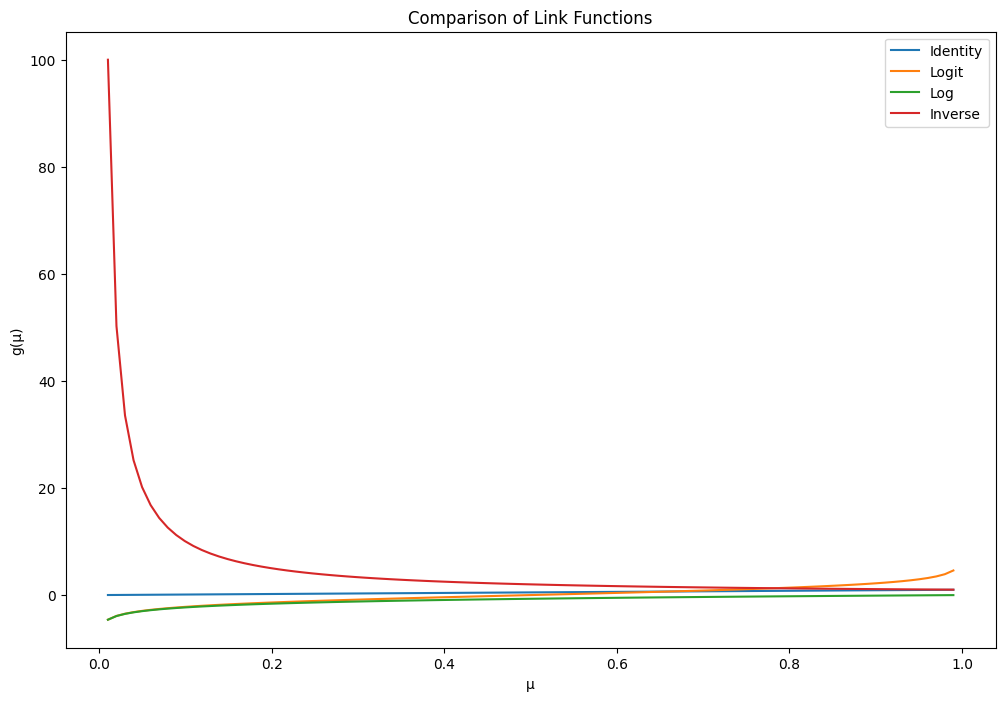

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0.01, 0.99, 100)

# Define link functions
identity = x
logit = np.log(x / (1 - x))
log = np.log(x)
inverse = 1 / x

# Plot
plt.figure(figsize=(12, 8))
plt.plot(x, identity, label='Identity')
plt.plot(x, logit, label='Logit')
plt.plot(x, log, label='Log')
plt.plot(x, inverse, label='Inverse')
plt.legend()
plt.title('Comparison of Link Functions')
plt.xlabel('μ')
plt.ylabel('g(μ)')

This plot shows how different link functions transform the expected value of the response variable. Notice how the logit function stretches values near 0 and 1, while the log function compresses larger values.


### <a id='toc3_5_'></a>[Practical Example: Predicting Insurance Claims](#toc0_)


Let's walk through an example of choosing a link function for predicting insurance claim amounts:

1. **Response Variable:** Claim amounts (always positive, right-skewed)
2. **Potential Distributions:** Gamma or Inverse Gaussian
3. **Common Link Functions:** Inverse or Log


We might start with a Gamma distribution and an inverse link:


```python
# Pseudo-code
model_inverse = GLM(claim_amount ~ age + car_value, family=Gamma(), link=InverseLink())
model_log = GLM(claim_amount ~ age + car_value, family=Gamma(), link=LogLink())
```


We would then compare the model diagnostics and performance metrics to choose the better link function.


Link functions are the unsung heroes of Generalized Linear Models, allowing us to model a wide range of response variables and relationships. By choosing the appropriate link function, we can ensure our model accurately captures the nature of our data while maintaining the interpretability and flexibility of linear models.


Remember:
- The link function connects the linear predictor to the expected value of the response.
- Common link functions include identity, logit, log, and inverse.
- Choose your link function based on the range of your response variable, the nature of the relationship, and the assumed probability distribution.
- Always check model assumptions and compare different link functions when in doubt.


In the next section, we'll explore how to put all the components of GLMs together and apply them to real-world problems.

## <a id='toc4_'></a>[Common Probability Distributions in GLMs](#toc0_)

Understanding the probability distributions used in Generalized Linear Models (GLMs) is crucial for selecting the appropriate model for your data. In this section, we'll explore the most common distributions used in GLMs, their characteristics, and when to use them.


The probability distribution in a GLM describes the random component of the model, determining how the response variable is distributed and what kind of variability we expect to see. Choosing the right distribution is like selecting the right measuring tool for a job. Just as you wouldn't use a thermometer to measure distance, you wouldn't use a normal distribution to model binary outcomes.


Let's dive into the most frequently used distributions in GLMs:


1. Normal (Gaussian) Distribution

- 📊 **Shape:** Symmetric, bell-shaped curve
- 🔢 **Range:** Any real number (-∞ to +∞)
- 📈 **Use Case:** Continuous data that's roughly symmetric around a mean


**Example:** Predicting house prices based on square footage and number of bedrooms.

```python
# Pseudo-code for linear regression (Normal distribution)
model = GLM(house_price ~ sqft + bedrooms, family=Gaussian(), link=IdentityLink())
```


🤔 **Why This Matters:** The normal distribution is the foundation of many statistical methods. It's appropriate when you expect your errors to be symmetrically distributed around the mean.


2. Binomial Distribution

- 📊 **Shape:** Discrete, two possible outcomes
- 🔢 **Range:** 0 to 1 (for proportions) or 0 to n (for counts out of n trials)
- 📈 **Use Case:** Binary outcomes or proportions


**Example:** Predicting whether a customer will churn (yes/no) based on their usage patterns and demographics.

```python
# Pseudo-code for logistic regression (Binomial distribution)
model = GLM(churn ~ usage + age, family=Binomial(), link=LogitLink())
```


💡 **Pro Tip:** The binomial distribution is the go-to choice for any binary outcome or proportion data. It's the backbone of logistic regression.


3. Poisson Distribution

- 📊 **Shape:** Discrete, right-skewed
- 🔢 **Range:** Non-negative integers (0, 1, 2, ...)
- 📈 **Use Case:** Count data, especially for rare events

**Example:** Predicting the number of car accidents at an intersection per month based on traffic volume and weather conditions.

```python
# Pseudo-code for Poisson regression
model = GLM(accidents ~ traffic + rain_days, family=Poisson(), link=LogLink())
```


❗️ **Important Note:** The Poisson distribution assumes that the mean is equal to the variance. When this assumption is violated (called overdispersion), consider using the Negative Binomial distribution instead.


4. Gamma Distribution

- 📊 **Shape:** Continuous, right-skewed
- 🔢 **Range:** Positive real numbers (0 to +∞)
- 📈 **Use Case:** Positive, continuous, right-skewed data


**Example:** Predicting insurance claim amounts based on policyholder characteristics and coverage types.

```python
# Pseudo-code for Gamma regression
model = GLM(claim_amount ~ age + coverage, family=Gamma(), link=InverseLink())
```


🤔 **Why This Matters:** The Gamma distribution is excellent for modeling positive, continuous data with a constant coefficient of variation. It's often used in finance and insurance for modeling skewed data.


5. Negative Binomial Distribution

- 📊 **Shape:** Discrete, right-skewed (more flexible than Poisson)
- 🔢 **Range:** Non-negative integers (0, 1, 2, ...)
- 📈 **Use Case:** Count data with overdispersion


**Example:** Predicting the number of fish caught by anglers, where some are much more skilled than others.

```python
# Pseudo-code for Negative Binomial regression
model = GLM(fish_caught ~ experience + location, family=NegativeBinomial(), link=LogLink())
```


💡 **Pro Tip:** The Negative Binomial distribution is a more flexible alternative to the Poisson distribution when you have overdispersed count data.


### <a id='toc4_2_'></a>[Choosing the Right Distribution](#toc0_)


Selecting the appropriate distribution is crucial for building an effective GLM. Here are some guidelines:

1. **Consider the Nature of Your Response Variable:**
   - Continuous, symmetric: Normal distribution
   - Binary or proportion: Binomial distribution
   - Counts: Poisson or Negative Binomial distribution
   - Positive, continuous, skewed: Gamma distribution

2. **Check the Range of Your Data:**
   - Can it take any real value? Consider Normal.
   - Is it always positive? Consider Gamma or log-transformed Normal.
   - Is it a count? Consider Poisson or Negative Binomial.

3. **Examine the Variance Structure:**
   - Is the variance constant? Normal might be appropriate.
   - Does the variance increase with the mean? Consider Poisson or Gamma.
   - Is the variance larger than expected for a Poisson? Consider Negative Binomial.

4. **Plot Your Data:**
   - Histogram or density plot can give you a visual idea of the distribution.
   - Q-Q plot can help you assess if Normal distribution is appropriate.

5. **Consider Domain Knowledge:**
   - Some fields have traditional choices. For example, Poisson for rare events, Gamma for insurance claims.


### <a id='toc4_3_'></a>[Visualizing Distributions](#toc0_)


Let's visualize these distributions to get a better sense of their shapes:


Text(0.5, 1.0, 'Gamma Distribution')

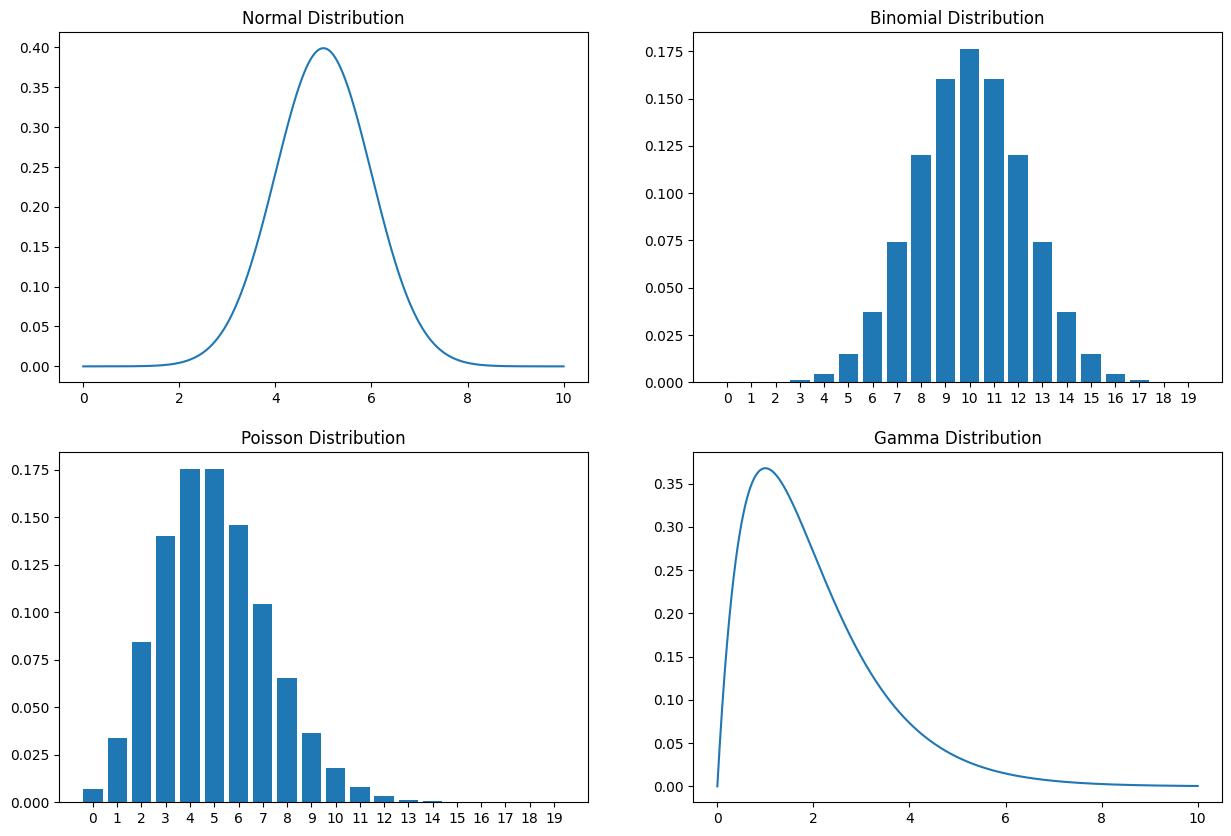

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data
x = np.linspace(0, 10, 1000)
x_discrete = np.arange(0, 20)

# Plot distributions
plt.figure(figsize=(15, 10))

# Normal
plt.subplot(2, 2, 1)
plt.plot(x, stats.norm.pdf(x, 5, 1))
plt.title('Normal Distribution')

# Binomial
plt.subplot(2, 2, 2)
plt.bar(x_discrete, stats.binom.pmf(x_discrete, 20, 0.5))
plt.xticks(x_discrete)  # Set x-ticks to discrete values
plt.title('Binomial Distribution')

# Poisson
plt.subplot(2, 2, 3)
plt.bar(x_discrete, stats.poisson.pmf(x_discrete, 5))
plt.xticks(x_discrete)  # Set x-ticks to discrete values
plt.title('Poisson Distribution')

# Gamma
plt.subplot(2, 2, 4)
plt.plot(x, stats.gamma.pdf(x, a=2))
plt.title('Gamma Distribution')

This plot shows the characteristic shapes of these distributions, helping you visualize how they might fit your data.


### <a id='toc4_4_'></a>[Practical Example: Analyzing Customer Churn](#toc0_)


Let's walk through an example of choosing a distribution for analyzing customer churn:

1. **Response Variable:** Whether a customer churned (yes/no)
2. **Potential Distributions:** Binomial (since it's a binary outcome)
3. **Link Function:** Logit (common for binomial data)


```python
# Pseudo-code
model = GLM(churn ~ usage + tenure + support_calls, family=Binomial(), link=LogitLink())
```


After fitting the model, we'd examine diagnostics to ensure the binomial distribution was appropriate.


Understanding the common probability distributions used in GLMs is crucial for building effective models. Each distribution has its own characteristics and is suited to different types of data:

- Normal: For continuous, symmetric data
- Binomial: For binary outcomes or proportions
- Poisson: For count data, especially rare events
- Gamma: For positive, continuous, right-skewed data
- Negative Binomial: For overdispersed count data


Remember:
- The choice of distribution affects your model's assumptions and how it handles vari

## <a id='toc5_'></a>[Choosing the Right GLM for Your Data](#toc0_)

Selecting the appropriate Generalized Linear Model for your data is a crucial step in the modeling process. In this section, we'll explore a systematic approach to choosing the right GLM, considering the nature of your data, research questions, and model assumptions.


Choosing the right GLM ensures that your model accurately represents the underlying data-generating process, leading to valid inferences and reliable predictions. Imagine you're a doctor selecting a treatment. Just as you wouldn't prescribe the same medication for every ailment, you shouldn't use the same statistical model for every dataset. The right model choice can make the difference between insightful conclusions and misleading results.

### <a id='toc5_1_'></a>[A Step-by-Step Approach to Choosing Your GLM](#toc0_)


Let's break down the process of selecting the appropriate GLM into manageable steps:


**Step 1: Understand Your Response Variable**


The nature of your response variable is the primary factor in determining which GLM to use.

1. **What type of data is it?**
   - Continuous
   - Binary
   - Count
   - Proportion
   - Ordinal

2. **What is the range of possible values?**
   - Any real number
   - Only positive values
   - Between 0 and 1
   - Integers starting from 0

3. **How is it distributed?**
   - Symmetric
   - Right-skewed
   - Left-skewed


💡 **Pro Tip:** Visualize your response variable using histograms or density plots to get a sense of its distribution.


**Step 2: Consider Your Research Question**


Your research objectives will influence your model choice.

- Are you interested in predicting probabilities?
- Do you need to model counts or rates?
- Are you dealing with time-to-event data?


**Step 3: Examine the Relationship Between Predictors and Response**


Look at scatterplots or correlation matrices to understand how your predictors relate to the response variable.

- Is the relationship linear?
- Is there evidence of non-linearity?
- Are there interaction effects?


**Step 4: Check for Overdispersion**


For count data, check if the variance is larger than the mean, indicating overdispersion.

In [36]:
# Pseudo-code to check for overdispersion
y = np.random.poisson(size=100)

mean = np.mean(y)
variance = np.var(y)
dispersion = variance / mean
print(f"Dispersion: {dispersion}")

Dispersion: 1.1231578947368424


If the dispersion is significantly greater than 1, consider models that account for overdispersion.


**Step 5: Consider Sample Size and Number of Predictors**


Ensure you have enough data to estimate the model parameters reliably. As a rule of thumb, aim for at least 10-20 observations per predictor variable.


### <a id='toc5_2_'></a>[Common GLMs and When to Use Them](#toc0_)


Here's a quick reference guide for choosing the right GLM based on your response variable:

1. **Linear Regression (Normal GLM)**
   - Response: Continuous, symmetric
   - Range: Any real number
   - Link Function: Identity
   - Use When: Your response is approximately normally distributed

2. **Logistic Regression (Binomial GLM)**
   - Response: Binary or proportion
   - Range: 0 to 1
   - Link Function: Logit
   - Use When: Predicting probabilities or modeling binary outcomes

3. **Poisson Regression**
   - Response: Count data
   - Range: Non-negative integers
   - Link Function: Log
   - Use When: Modeling count data, especially for rare events

4. **Negative Binomial Regression**
   - Response: Count data with overdispersion
   - Range: Non-negative integers
   - Link Function: Log
   - Use When: Modeling count data with extra variability

5. **Gamma Regression**
   - Response: Continuous, positive, right-skewed
   - Range: Positive real numbers
   - Link Function: Inverse or Log
   - Use When: Modeling positive continuous data with constant coefficient of variation

6. **Ordinal Regression**
   - Response: Ordinal categories
   - Range: Ordered categories
   - Link Function: Logit or Probit
   - Use When: Modeling ordered categorical outcomes


### <a id='toc5_3_'></a>[Practical Example: Choosing a GLM for Customer Lifetime Value](#toc0_)


Let's walk through an example of choosing a GLM for predicting customer lifetime value (CLV):


1. **Examine the Response Variable (CLV):**
   - Type: Continuous
   - Range: Positive values
   - Distribution: Right-skewed (typical for monetary values)


2. **Visualize the Data:**


```python
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['CLV'], kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLV')
plt.show()
```


3. **Consider Potential Models:**
   - Given the positive, continuous, right-skewed nature of CLV, we might consider:
     a) Gamma Regression
     b) Log-transformed Linear Regression


4. **Fit and Compare Models:**

```python
# Pseudo-code
# Gamma Regression
gamma_model = GLM(CLV ~ age + tenure + purchase_frequency, 
                  family=Gamma(link=log), data=data)

# Log-transformed Linear Regression
log_linear_model = OLS(np.log(CLV) ~ age + tenure + purchase_frequency, 
                       data=data)

# Compare model performance (e.g., using AIC or cross-validation)
print(AIC(gamma_model), AIC(log_linear_model))
```


5. **Check Model Assumptions:**
   - Examine residual plots, Q-Q plots, and other diagnostics to ensure the chosen model meets assumptions.


6. **Make a Final Decision:**
   - Based on model performance, assumption checks, and interpretability, choose the most appropriate model.


### <a id='toc5_4_'></a>[Common Pitfalls to Avoid](#toc0_)


❗️ **Important Note:** Be aware of these common mistakes when choosing a GLM:

1. **Ignoring the nature of your response variable:** Don't use linear regression for binary outcomes or proportions.

2. **Overlooking overdispersion:** For count data, always check for overdispersion before settling on a Poisson model.

3. **Blindly applying transformations:** While log-transforming skewed data can be helpful, it changes the interpretation of your model. Make sure this aligns with your research goals.

4. **Ignoring domain knowledge:** Sometimes, the theoretically "best-fitting" model may not align with established practices in your field. Consider both statistical fit and domain expertise.

5. **Not checking model assumptions:** Always validate your model's assumptions using diagnostic plots and tests.


Choosing the right GLM for your data is a critical step in the modeling process. By carefully considering the nature of your response variable, research questions, and model assumptions, you can select a GLM that accurately represents your data and provides meaningful insights.


Remember:
- Start by understanding your response variable's type, range, and distribution.
- Consider your research questions and the relationships between predictors and the response.
- Be aware of special cases like overdispersion in count data.
- Fit multiple models when in doubt and compare their performance.
- Always check model assumptions and diagnostics.


By following these guidelines, you'll be well-equipped to choose the most appropriate GLM for your data, leading to more reliable analyses and insights.

## <a id='toc6_'></a>[Advantages and Limitations of GLMs](#toc0_)

Generalized Linear Models (GLMs) are powerful and flexible tools in the data scientist's toolkit. However, like any statistical method, they come with their own set of strengths and weaknesses. In this section, we'll explore the advantages and limitations of GLMs, helping you understand when they shine and when to consider alternative approaches.


### <a id='toc6_1_'></a>[Advantages of GLMs](#toc0_)


🔑 **Key Concept:** GLMs extend the linear regression framework to handle a wide variety of data types and relationships, making them versatile and widely applicable.


Let's dive into the key advantages of using GLMs:


**1. Flexibility in Handling Different Types of Data**

GLMs can model various types of response variables, including:
- Continuous data (Normal distribution)
- Binary data (Binomial distribution)
- Count data (Poisson or Negative Binomial distribution)
- Proportion data (Binomial distribution)
- Positive continuous data (Gamma distribution)


This flexibility allows researchers to use a consistent framework across different types of studies and datasets.


**2. Ability to Model Non-linear Relationships**

Through the use of link functions, GLMs can model non-linear relationships between predictors and the response variable while maintaining the interpretability of linear models.


💡 **Pro Tip:** The log link in Poisson regression, for example, allows for modeling multiplicative effects, which are common in many real-world phenomena.


**3. Interpretability**

Despite their ability to model complex relationships, GLMs maintain a high degree of interpretability. The coefficients in a GLM have clear meanings in terms of the link function and the scale of the response variable.


For example, in logistic regression:
```python
log_odds = -2.3 + 0.5 * age + 1.2 * income
```
We can interpret that a one-unit increase in age is associated with a 0.5 increase in the log-odds of the outcome, holding other variables constant.


**4. Unified Theoretical Framework**

GLMs provide a unified theoretical framework that encompasses many common statistical models. This unified approach simplifies the learning process and allows for easier comparison between different types of models.


**5. Handling of Non-constant Variance**

Unlike ordinary least squares regression, which assumes constant variance (homoscedasticity), GLMs can naturally handle situations where the variance of the response variable changes with its mean.


**6. Efficient Use of Data**

GLMs can often make more efficient use of data compared to alternative approaches. For example, logistic regression can be more efficient than discriminant analysis when modeling binary outcomes.


**7. Robust to Outliers**

Certain GLMs, particularly those using robust link functions, can be less sensitive to outliers compared to ordinary least squares regression.


### <a id='toc6_2_'></a>[Limitations of GLMs](#toc0_)


While GLMs are powerful and flexible, they do have some limitations that are important to understand:


**1. Assumption of Independence**

GLMs assume that observations are independent of each other. This assumption can be violated in many real-world scenarios, such as time series data or clustered data.


❗️ **Important Note:** When dealing with non-independent data, consider using extensions of GLMs such as Generalized Estimating Equations (GEE) or mixed-effects models.


**2. Difficulty in Handling Interactions**

While GLMs can include interaction terms, interpreting these interactions can be challenging, especially with non-linear link functions.


**3. Sensitivity to Link Function Choice**

The choice of link function can significantly impact model results. An inappropriate link function can lead to poor model fit and misleading conclusions.


```python
# Example: Comparing different link functions
model_logit = GLM(y ~ x1 + x2, family=Binomial(link=logit))
model_probit = GLM(y ~ x1 + x2, family=Binomial(link=probit))
model_cloglog = GLM(y ~ x1 + x2, family=Binomial(link=cloglog))

# Compare model fits
print(AIC(model_logit), AIC(model_probit), AIC(model_cloglog))
```


**4. Assumption of Linearity in the Link Scale**

GLMs assume that the relationship between predictors and the transformed response (via the link function) is linear. This assumption can be violated in practice.


**5. Difficulty with Extreme Imbalance**

In cases of extreme imbalance (e.g., rare events in logistic regression), GLMs may struggle to provide accurate predictions.


**6. Limited Ability to Handle Complex Non-linear Relationships**

While GLMs can model some non-linear relationships through link functions, they may not capture highly complex non-linear patterns as effectively as some machine learning methods (e.g., random forests or neural networks).


**7. Potential for Complete or Quasi-complete Separation**

In logistic regression, complete or quasi-complete separation can occur when a predictor or combination of predictors perfectly separates the response categories. This can lead to infinite coefficient estimates.


### <a id='toc6_3_'></a>[When to Use GLMs (and When Not To)](#toc0_)


Understanding the advantages and limitations of GLMs can help you decide when to use them and when to consider alternatives.


Use GLMs when:
- You have a clear understanding of the relationship between predictors and the response.
- Interpretability is a key concern.
- You're dealing with non-normal response variables that fit well into the exponential family of distributions.
- You want to model the probability of an event occurring.


Consider alternatives when:
- You have highly complex, non-linear relationships that can't be captured by link functions.
- You're dealing with non-independent observations (consider mixed-effects models).
- You have a very large number of predictors relative to observations, in this case consider regularized regression or machine learning methods such as random forests or neural networks.
- Predictive accuracy is more important than interpretability, in this case consider machine learning methods such as random forests or neural networks.


Generalized Linear Models offer a powerful and flexible framework for analyzing a wide range of data types. Their key advantages include flexibility, interpretability, and a unified theoretical framework. However, they also come with limitations, such as sensitivity to link function choice and assumptions about the nature of relationships between variables.


By understanding these advantages and limitations, you can make informed decisions about when to use GLMs and when to consider alternative approaches. Remember that no single modeling approach is perfect for all situations, and the choice of method should always be guided by the nature of your data, your research questions, and the assumptions you're willing to make.


As you continue to work with GLMs, keep these points in mind:
- Always check model assumptions and diagnostics.
- Consider multiple model specifications when in doubt.
- Be aware of the trade-offs between model complexity and interpretability.
- Don't hesitate to explore alternative methods when GLMs fall short.


By thoughtfully applying GLMs and being aware of their strengths and weaknesses, you'll be well-equipped to extract meaningful insights from your data across a wide range of scenarios.

## <a id='toc7_'></a>[Summary](#toc0_)

As we conclude our exploration of Generalized Linear Models (GLMs), let's recap the key concepts we've covered and reflect on the broader implications of this powerful statistical framework. Key takeaways include:

1. **GLM Components:** We learned that every GLM consists of three essential parts:
   - The Random Component (probability distribution of the response variable)
   - The Systematic Component (linear combination of predictors)
   - The Link Function (connecting the random and systematic components)

2. **Flexibility:** GLMs extend the linear regression framework to handle various types of response variables, including continuous, binary, count, and proportion data.

3. **Probability Distributions:** We explored common distributions used in GLMs, such as Normal, Binomial, Poisson, Negative Binomial, and Gamma, understanding their characteristics and appropriate use cases.

4. **Link Functions:** We discussed how link functions allow GLMs to model non-linear relationships while maintaining interpretability, with examples like logit, log, and inverse links.

5. **Model Selection:** We learned a systematic approach to choosing the right GLM based on the nature of the data, research questions, and model assumptions.

6. **Advantages and Limitations:** We examined the strengths of GLMs, such as their flexibility and interpretability, as well as their limitations, including sensitivity to link function choice and assumptions about independence.


As you continue your journey in data analysis:

- Explore extensions of GLMs, such as Generalized Additive Models (GAMs) for more flexible modeling of non-linear relationships.
- Look into mixed-effects models for handling hierarchical or longitudinal data.
- Consider how GLMs fit into the broader landscape of statistical and machine learning methods.


Generalized Linear Models represent a powerful bridge between traditional linear regression and more complex statistical methods. By mastering GLMs, you've gained a versatile tool that can handle a wide range of real-world data analysis challenges.


Remember, the true power of GLMs lies not just in their mathematical formulation, but in their ability to provide interpretable insights into complex phenomena. As you apply these models in your work, always strive to balance statistical rigor with practical interpretability and relevance to your research questions.


🤔 **Why This Matters:** In an era of big data and complex analytical methods, GLMs offer a sweet spot of flexibility, interpretability, and statistical soundness. They allow you to tackle diverse analytical challenges while maintaining a clear understanding of your model's behavior and implications.


As you move forward, continue to practice and refine your skills with GLMs. Experiment with different datasets, challenge yourself with complex research questions, and always remain curious about the underlying processes generating your data. With GLMs in your toolkit, you're well-equipped to uncover meaningful patterns and insights across a wide spectrum of data analysis scenarios.


Keep learning, stay curious, and happy modeling!